<h1 align='Center'> Research Paper Analysis System </h1>

<div align='left'>
  The idea is that we are going to try different approaches and existing systems to compare how well all the different approaches perform in extracting key informations from the research paper and what must be done to solve some problem that arises along the way </div>
<br>

<h3 align='left'> <a href='https://github.com/PaddlePaddle/PaddleOCR' style="color: White;"> 1.0. Paddle OCR </a> </h3>

This is one of the leading Library/Framework for handling documentation parts classification and recognition  More on this can be observed on the image below

<img src='https://user-images.githubusercontent.com/25809855/186171245-40abc4d7-904f-4949-ade1-250f86ed3a90.png' algn='center'>

In [ ]:
!pip install paddlepaddle

In [32]:
import os
import cv2
from paddleocr import PPStructure,draw_structure_result
from PIL import Image
import fitz

In [63]:

def get_proper_labeled_document_paddle_ocr(img_path):
  table_engine = PPStructure(show_log=False)
  print('Initalized Extraction: ')
  colors_dct={
      'title':(0,255,0),
      'text':(0,0,255),
      'table':(255,0,0),
      'figure':(0,0,0),
      'figure_caption':(0,255,100),
      'header': (112,112,34),
      'equation':(138,108,152),
      'reference':(170,25,255)
  }


  img = cv2.imread(img_path)
  result = table_engine(img)

  for line in result:
      line.pop('img')
      cords=line['bbox']
      try:
        cv2.rectangle(img,(cords[0],cords[1]),(cords[2],cords[3]),colors_dct[line['type']],1)
        img = cv2.putText(img,line['type'],(cords[2]+5,cords[3]+5),cv2.FONT_HERSHEY_SIMPLEX,0.5,colors_dct[line['type']],1,cv2.LINE_AA)
      except:
        pass
  display(Image.fromarray(img))


<h3> Reults: Paddle OCR </h3>

The Cell below provides the results of all detection and localization of all classesusing paddle ocr 

Initalized Extraction: 


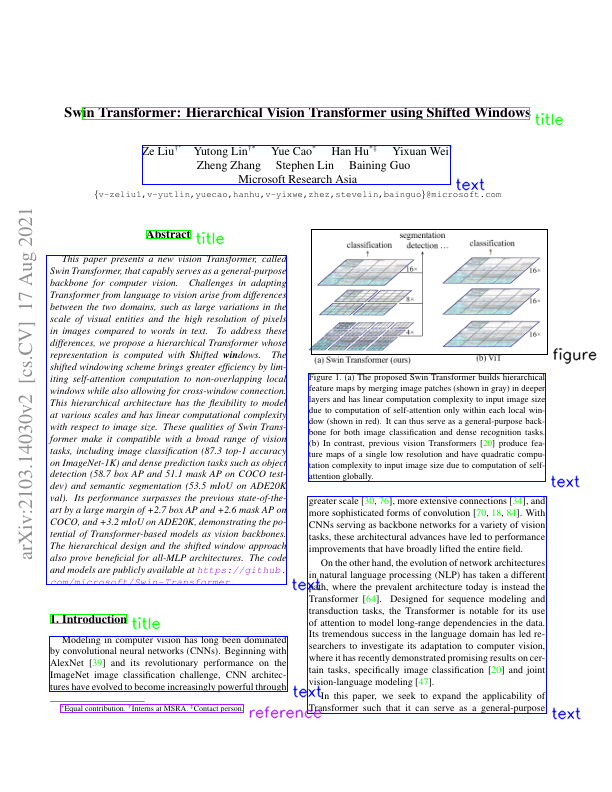

--------------------------------------------------
Initalized Extraction: 


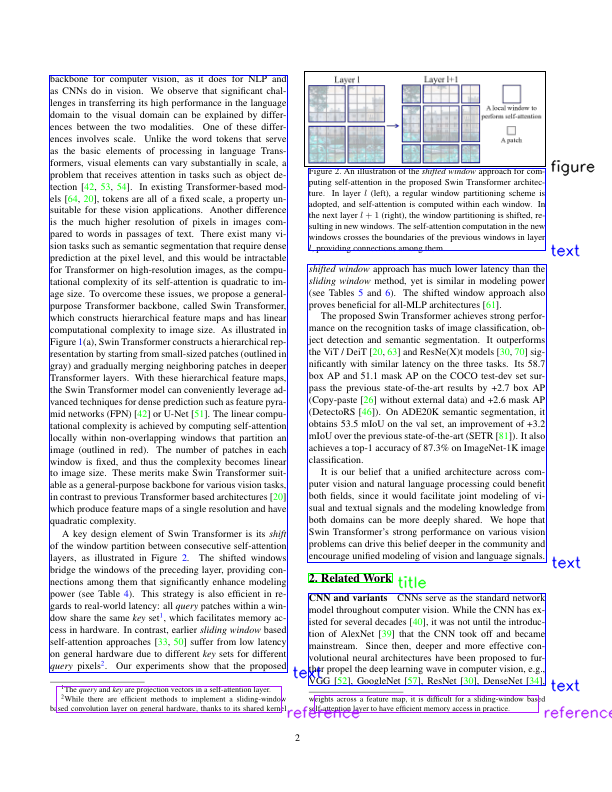

--------------------------------------------------
Initalized Extraction: 


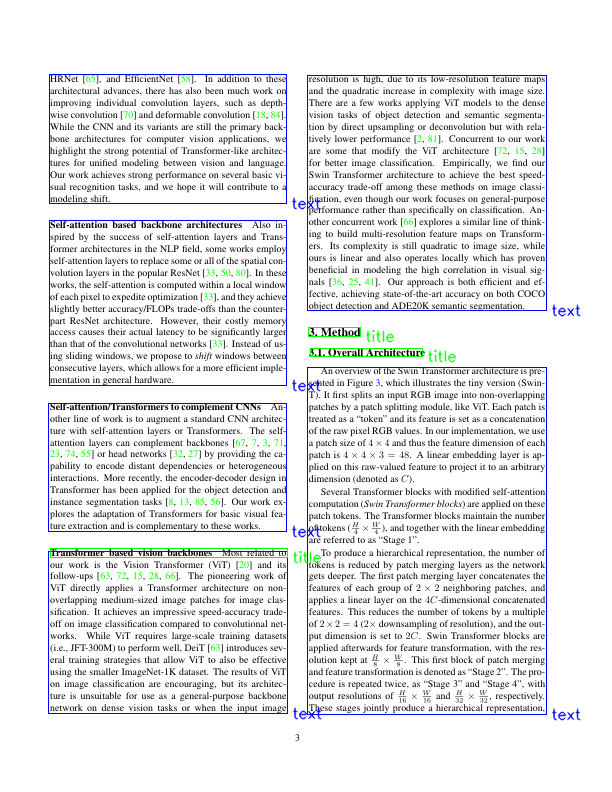

--------------------------------------------------
Initalized Extraction: 


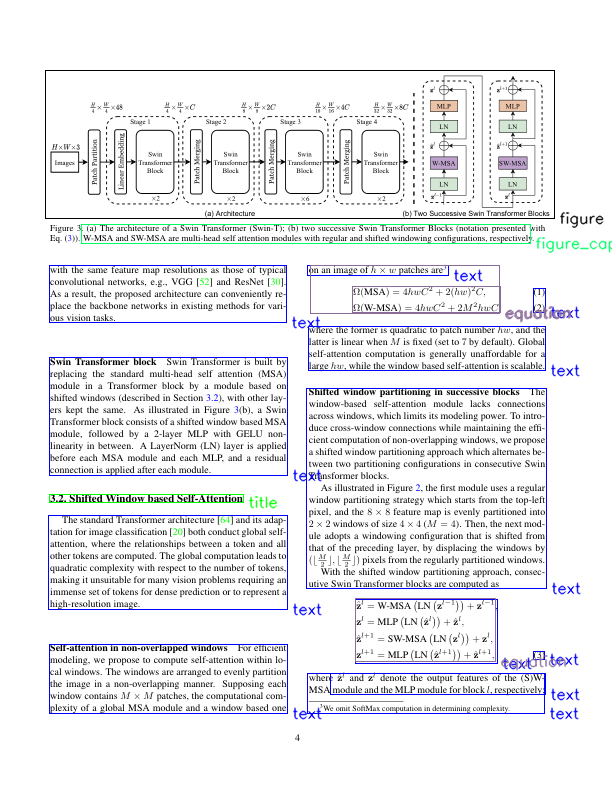

--------------------------------------------------
Initalized Extraction: 


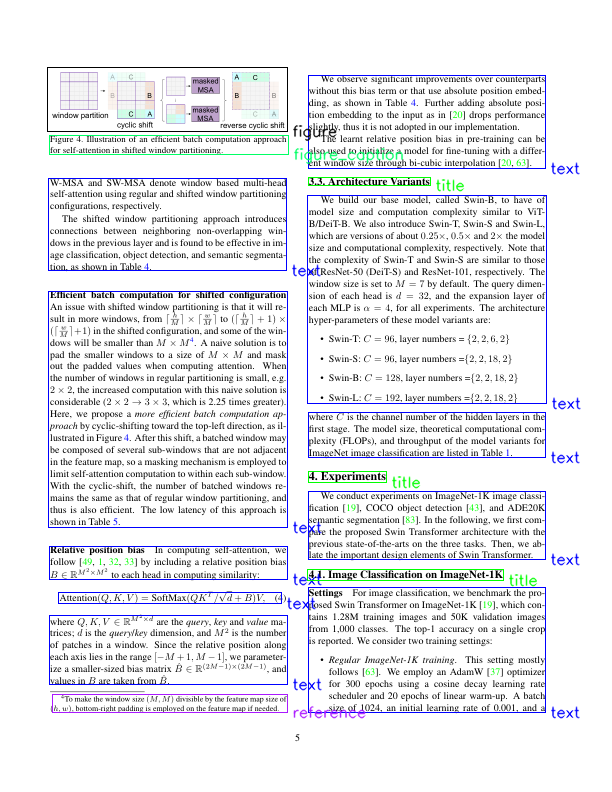

--------------------------------------------------
Initalized Extraction: 


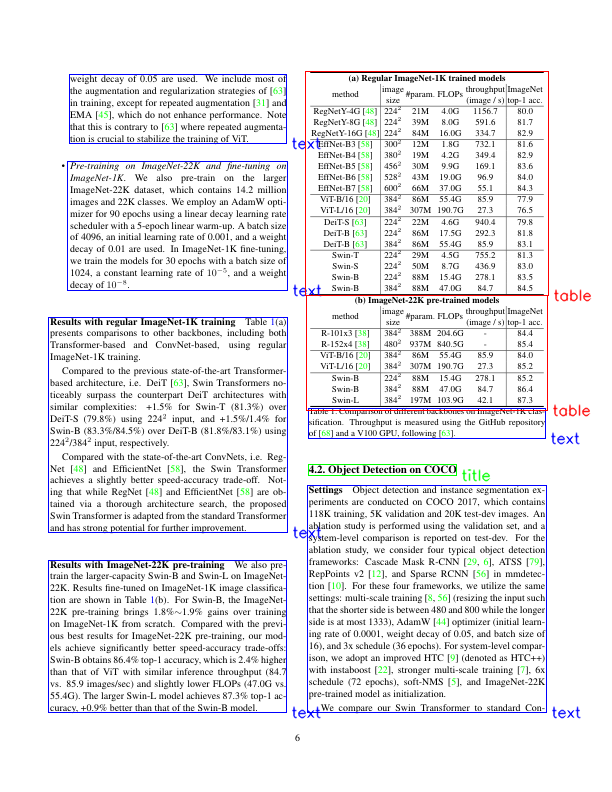

--------------------------------------------------
Initalized Extraction: 


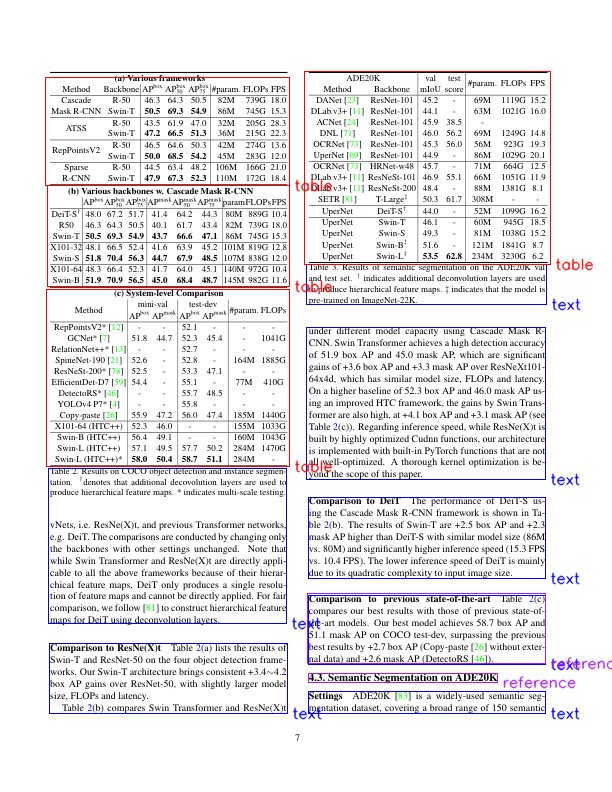

--------------------------------------------------
Initalized Extraction: 


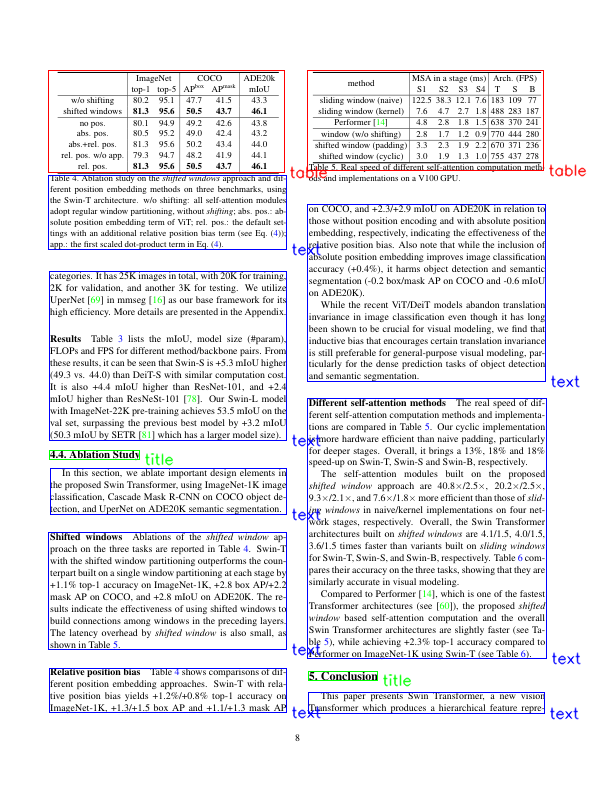

--------------------------------------------------
Initalized Extraction: 


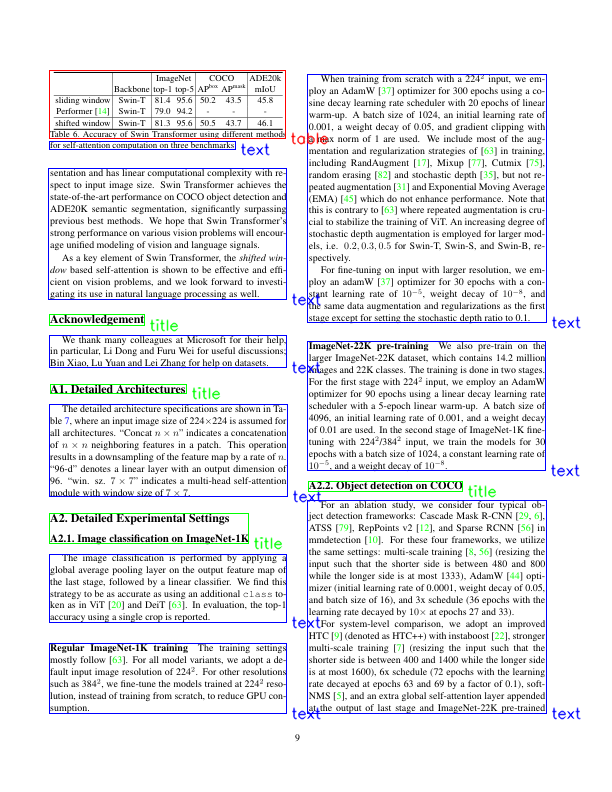

--------------------------------------------------
Initalized Extraction: 


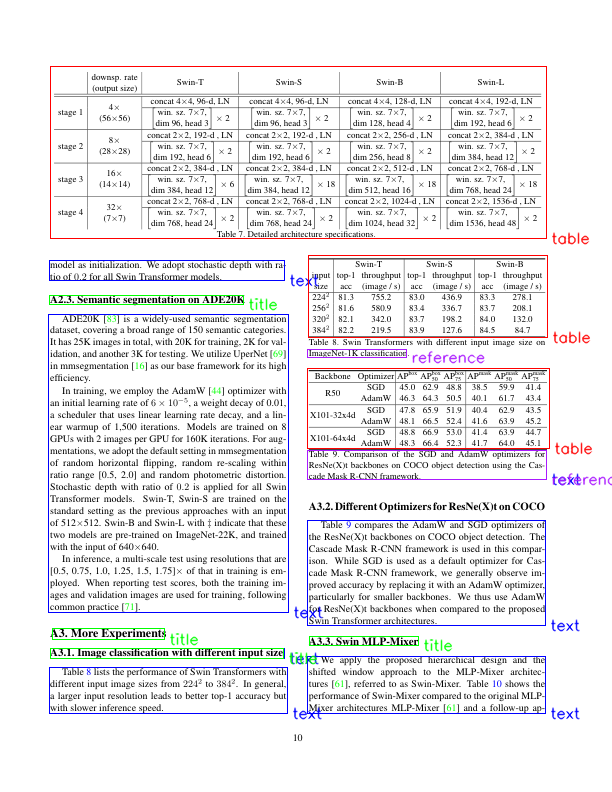

--------------------------------------------------
Initalized Extraction: 


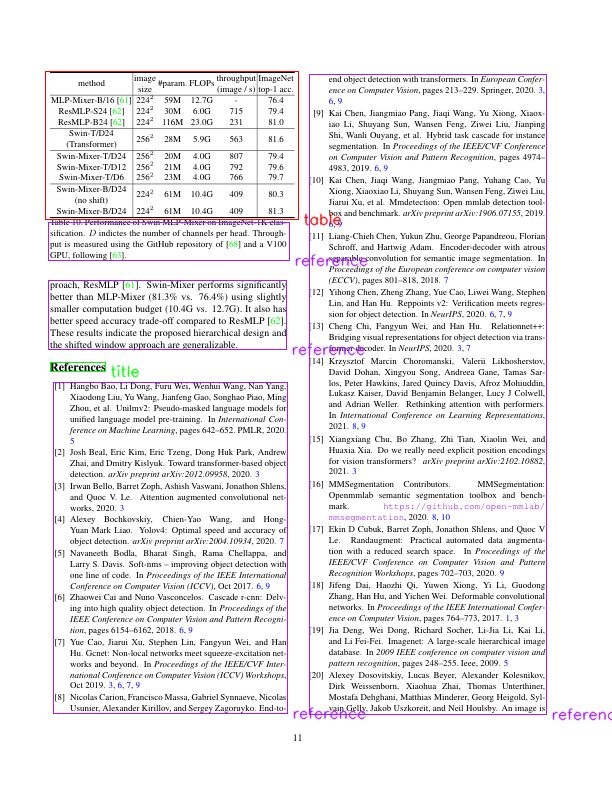

--------------------------------------------------
Initalized Extraction: 


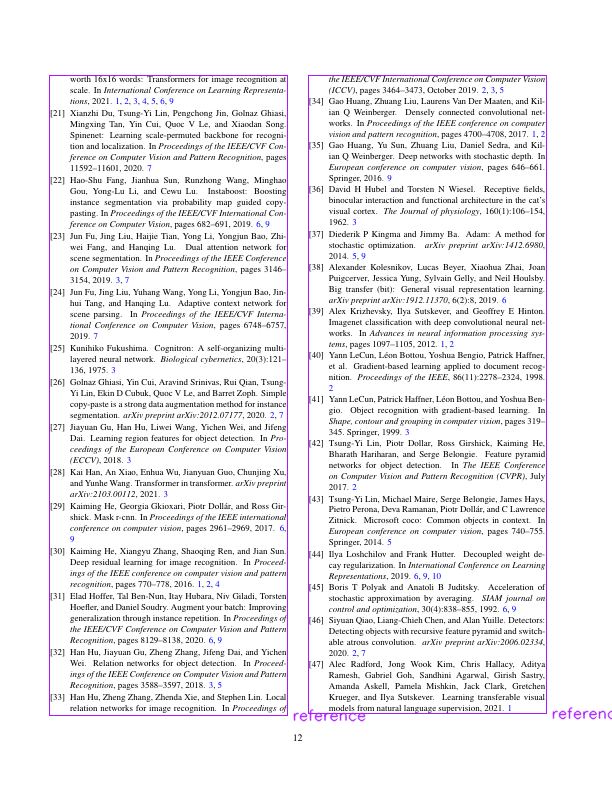

--------------------------------------------------
Initalized Extraction: 


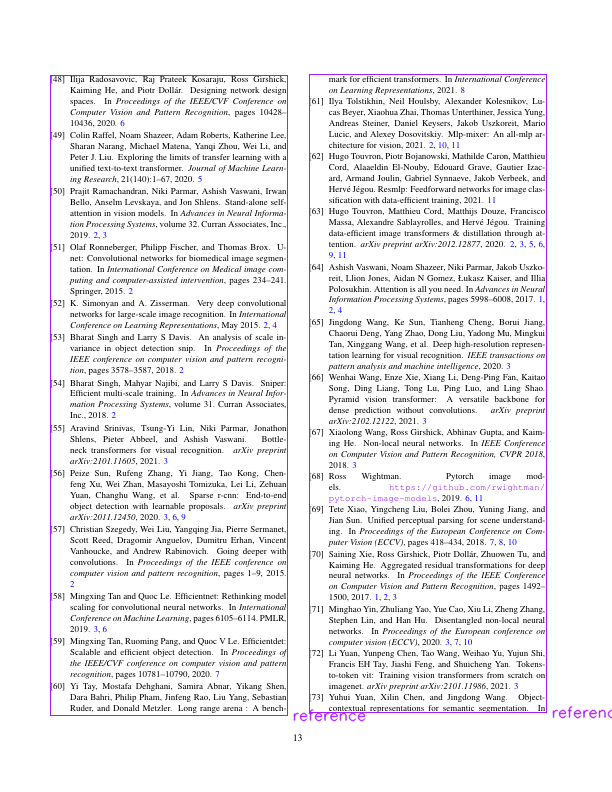

--------------------------------------------------
Initalized Extraction: 


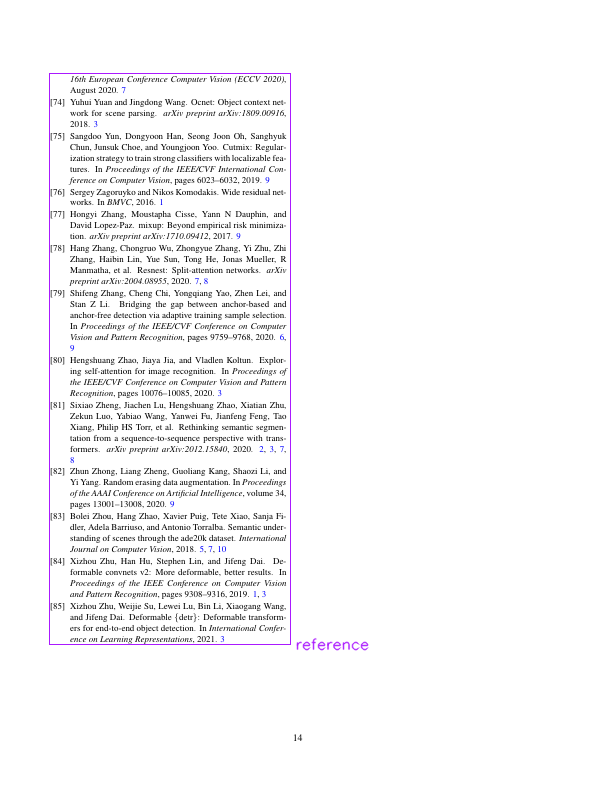

--------------------------------------------------


In [65]:
pdf_file=fitz.open('/content/4. SWIN Transformer Paper.pdf')

for page in pdf_file:
  page_content = page.get_pixmap(alpha=False)
  page_content.save("/content/temp_img.jpg")
  get_proper_labeled_document_paddle_ocr("/content/temp_img.jpg")
  print('--'*25)
